# XGBoost

## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.inspection import permutation_importance

pd.set_option('display.max_columns', None)

## Importing data

In [2]:
data = pd.read_csv('../data/5_train_dataset.csv')

In [3]:
test = pd.read_csv('../data/4_test_dataset.csv')

## XGBoost

Getting X & y

In [4]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

Initialise base XGBoost instance

In [4]:
xgboost = XGBClassifier(objective='binary:logistic')

Initialise parameter grid for grid search

In [5]:
parameter_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 0.9],
    "n_estimators": [100, 500, 1000],
    "max_depth": [1, 5, 9],
    "subsample": [0.3, 0.5, 0.9],
    "colsample_bytree": [0.3, 0.5, 0.9]
                  }

Run grid search on XGBoost

In [6]:
gs = GridSearchCV(estimator= xgboost,
                  param_grid= parameter_grid,
                  scoring= "recall",
                  verbose= 4)

In [7]:
gs.fit(X, y)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=1, n_estimators=100, subsample=0.3;, score=0.249 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=1, n_estimators=100, subsample=0.3;, score=0.287 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=1, n_estimators=100, subsample=0.3;, score=0.282 total time=   0.0s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=1, n_estimators=100, subsample=0.3;, score=0.321 total time=   0.0s
[CV 5/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=1, n_estimators=100, subsample=0.3;, score=0.268 total time=   0.0s
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=1, n_estimators=100, subsample=0.5;, score=0.303 total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.01, max_depth=1, n_estimators=100, subsample=0.5;, score=0.287 total time=   0.0s
[CV 3

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.5, 0.9],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5, 0.9],
                         'max_depth': [1, 5, 9],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.3, 0.5, 0.9]},
             scoring='recall', verbose=4)

Get results from grid search

In [8]:
print(f'Best hyper-parameters are: {gs.best_params_}\nRecall is: {round(gs.best_score_ * 100, 2)}%')

Best hyper-parameters are: {'colsample_bytree': 0.5, 'learning_rate': 0.9, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
Recall is: 90.82%


## Ideal model

Initalising XGBoost with ideal hyper-parameters 

In [5]:
xgboost_ideal = XGBClassifier(objective='binary:logistic', colsample_bytree=0.5, learning_rate=0.9, max_depth=5, n_estimators=100, subsample=0.9)

Training and getting predictions

In [6]:
X_train, y_train = X, y
X_test, y_test = X_test, y_test

In [7]:
model = xgboost_ideal.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

Getting results

In [8]:
acc_result = accuracy_score(y_test, y_test_pred)
recall_result = recall_score(y_test, y_test_pred)
precision_result = precision_score(y_test, y_test_pred)
f1_result = f1_score(y_test, y_test_pred)
roc_result = roc_auc_score(y_test, y_test_pred)
print(f'Accuracy score is : {round(acc_result*100, 2)}%')
print(f'Recall score is : {round(recall_result*100, 2)}%')
print(f'Precision score is : {round(precision_result*100, 2)}%')
print(f'F1 score is : {round(f1_result*100, 2)}%')
print(f'ROC-AUC score is : {round(roc_result*100, 2)}%')

Accuracy score is : 97.07%
Recall score is : 90.6%
Precision score is : 95.99%
F1 score is : 93.22%
ROC-AUC score is : 94.76%


## Feature Importance

Permutation importance

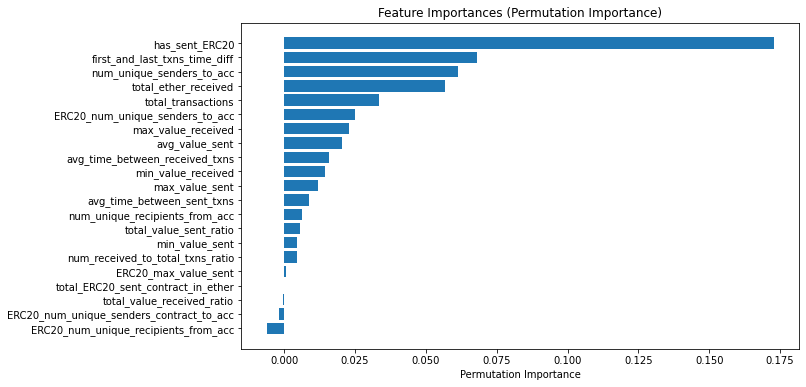

In [9]:
r = permutation_importance(xgboost_ideal, X_test, y_test, scoring = 'recall',
                           n_repeats=30,
                           random_state=0)
# Get feature importances and their names
feature_importances = r.importances_mean
feature_names = X_test.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = np.array(feature_names)[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances[::-1], align="center")
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names[::-1])
plt.xlabel("Permutation Importance")
plt.title("Feature Importances (Permutation Importance)")
plt.show()